# Setup Enviroment

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Import manipulation libraries
import random
import pandas as pd
import numpy as np

# Data visualization libraries
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)

# Machine learning libraries
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import average_precision_score
from mlxtend.frequent_patterns import apriori, association_rules


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5



/kaggle/input/ecommerce/Dataset.csv


# Importing the Data

In [2]:
# store the dataset into a pandas dataframe
df = pd.read_csv("/kaggle/input/ecommerce/Dataset.csv")

# print a sample of 10 rows
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
81943,543182,22435,SET OF 9 HEART SHAPED BALLOONS,4,2011-02-04 10:40:00,2.46,NaN,United Kingdom
128096,547249,85186A,EASTER BUNNY GARLAND OF FLOWERS,2,2011-03-22 09:27:00,0.83,NaN,United Kingdom
354688,567890,23375,50'S CHRISTMAS PAPER GIFT BAG,10,2011-09-22 15:40:00,0.82,14125.0,United Kingdom
223162,556474,22386,JUMBO BAG PINK POLKADOT,1,2011-06-12 12:01:00,2.08,16007.0,United Kingdom
251465,559055,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2011-07-05 17:09:00,3.29,NaN,United Kingdom
275429,560991,21638,ASSORTED TUTTI FRUTTI NOTEBOOK,12,2011-07-22 13:29:00,2.10,12438.0,Norway
26031,538453,20666,ECONOMY HOLIDAY PURSE,1,2010-12-12 12:26:00,2.95,16779.0,United Kingdom
166048,550838,21931,JUMBO STORAGE BAG SUKI,2,2011-04-21 11:31:00,2.08,14577.0,United Kingdom
308681,564049,22536,MAGIC DRAWING SLATE PURDEY,10,2011-08-22 13:30:00,0.42,17585.0,United Kingdom
201140,554271,21380,WOODEN HAPPY BIRTHDAY GARLAND,6,2011-05-23 13:06:00,2.95,16422.0,United Kingdom


# Understanding the Data

The dataset contains transactions for an e-commerce service, we can deduct the following about the attributes from our first glance:

* Invoice Number (InvoiceNo): A unique code for each transaction. If it starts with 'c', i guess it means the transaction was canceled.

* Product Code (StockCode): A unique code for each product item.

* Product Description (Description): The name of the product.

* Quantity: The number of each product sold in a transaction.

* Invoice Date (InvoiceDate): The date and time when the transaction occurred.

* Unit Price (UnitPrice): The price of one unit of the product in currency.

* Customer ID (CustomerID): A unique code for each customer.

* Country: The country where the customer resides.

In [3]:
# print the shape of the dataset
print("Shape of the dataset")
print("-"*30)
print(df.shape)

Shape of the dataset
------------------------------
(541909, 8)


In [4]:
# print some info about the dataset
print("Info about the dataset")
print("-"*30)
print(df.info())

Info about the dataset
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [5]:
# Check for missing values in the dataset
print("Missing Values")
print("-"*30)
print(df.isnull().sum())

Missing Values
------------------------------
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
# Check for duplicates in the dataset
print("Data duplication")
print("-"*30)
print(df.duplicated(keep=False).sum())

Data duplication
------------------------------
10147


In [7]:
# Check the unique values in the dataset
print("Unique Values")
print("-"*30)
print(df.nunique())

Unique Values
------------------------------
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


Size of Dataset: The dataset contains 541,909 rows (transactions) and 8 columns (attributes).

Invoice Date: The 'InvoiceDate' column is currently stored as an object (text), not in a proper date and time format.

Customer ID Type: The 'CustomerID' column is stored as float numbers, which seems weird for identifying customers.

Diverse Countries: The dataset includes transactions from customers in 38 different countries, which is quite fascinating!

Missing Customer IDs: There are missing values in the 'CustomerID' field, which is unexpected. Every transaction should ideally have a customer ID associated with it.

In [8]:
# calculate and print the percenatage of missing values in customerID column
CustomerID_missing_percentage = df['CustomerID'].isnull().sum() / df.shape[0] * 100
print("Percentage of CustomerID missing Values")
CustomerID_missing_percentage.round()

Percentage of CustomerID missing Values


25.0

Surprisingly, nearly 25% of the customer IDs are missing in this dataset. This seems unusual since each row corresponds to a transaction, and a customer ID should ideally be present for every transaction record.

# Data Cleaning

In [9]:
# Display rows with missing values in the 'Description' column
rows_with_missing_description = df[df['Description'].isnull()]
print("Rows with missing 'Description':")
rows_with_missing_description

Rows with missing 'Description':


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


We can see that the rows with missing Descriptions have also a missing customerID, another issue is that the UnitPrice is 0.0 which is incorrect.

In [10]:
# Display rows with missing values in 'Description' and 'CustomerID', and where 'UnitPrice' is 0.0
rows_with_missing_and_zero_price = df[df['Description'].isnull() & df['CustomerID'].isnull() & (df['UnitPrice'] == 0.0)]
print("Rows with missing in 'Description' and 'CustomerID' and with 'UnitPrice' = 0.0:")
rows_with_missing_and_zero_price

Rows with missing in 'Description' and 'CustomerID' and with 'UnitPrice' = 0.0:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


Now we made sure of our theory. All of those 1454 rows are invalid and should be dropped.

In [11]:
# drop rows with missing values
df = df.dropna()

In [12]:
# Check for missing values in the dataset
print("Missing Values")
print("-"*30)
print(df.isnull().sum())

Missing Values
------------------------------
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [13]:
# Check for duplicates in the dataset
print("Data duplication")
print("-"*30)
print(df.duplicated(keep=False).sum())

Data duplication
------------------------------
10062


In [14]:
# Drop duplicate rows
df = df.drop_duplicates()

In [15]:
# Check for duplicates in the dataset
print("Data duplication")
print("-"*30)
print(df.duplicated(keep=False).sum())

Data duplication
------------------------------
0


In [16]:
# Check Description of Numerical values
print("Data Description")
print("-"*30)
df.describe()

Data Description
------------------------------


,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


We can see 2 issues:
* UnitPrice has 0 as the min value. That cannot be right.
* Quantity has negative values. That also cannot be right.

In [17]:
# Count occurrences where 'UnitPrice' column is equal to 0.0
zero_unit_price_count = (df['UnitPrice'] == 0.0).sum()
print("Number of occurrences where UnitPrice is 0.0:", zero_unit_price_count)

Number of occurrences where UnitPrice is 0.0: 40


In [18]:
# Drop those 40 columns
df = df[df.UnitPrice != 0.0]

I also noticed that when the InvoiceNo starts with 'C", the quantity value is in negative.

In [19]:
# Identify canceled orders based on 'InvoiceNo' starting with 'C' and negative 'Quantity'
canceled_orders = df[df['InvoiceNo'].str.startswith('C') & (df['Quantity'] < 0)]

# Print the first few rows of canceled orders
print("Canceled Orders:")
canceled_orders

Canceled Orders:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


I will remove them from the data as they are not valid orders.

In [20]:
# Drop cancelled orders
df = df[df['Quantity'] > 0 ]

In [21]:
# print some info about the dataset
print("Info about the dataset")
print("-"*30)
print(df.info())

Info about the dataset
------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB
None


We can correct date datatype

In [22]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert CustomerID and InvoiceNo to integers
df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceNo'] = df['InvoiceNo'].astype(int)

In [23]:
# print some info about the dataset
print("Info about the dataset")
print("-"*30)
print(df.info())

Info about the dataset
------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  int64         
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.0+ MB
None


In [24]:
# Check Description of Numerical values
print("Data Description")
print("-"*30)
df.describe()

Data Description
------------------------------


,InvoiceNo,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000,392692.000000
mean,560590.875047,13.119702,3.125914,15287.843865
std,13087.063759,180.492832,22.241836,1713.539549
min,536365.000000,1.000000,0.001000,12346.000000
25%,549234.000000,2.000000,1.250000,13955.000000
50%,561874.000000,6.000000,1.950000,15150.000000
75%,572061.000000,12.000000,3.750000,16791.000000
max,581587.000000,80995.000000,8142.750000,18287.000000


As some StockCodes are reffering to different descriptions of the same items, let's make sure to only have one description per stockcode.

In [25]:
# Create a dictionary mapping StockCode to Description in the original dataset
stockcode_to_description_dict = df.groupby('StockCode')['Description'].apply(lambda x: x.value_counts().idxmax()).to_dict()

# Group by StockCode and choose the most common description
duplicate_stockcodes = df[df.duplicated(subset=['StockCode'], keep=False)]
stockcode_to_description = duplicate_stockcodes.groupby('StockCode')['Description'].apply(lambda x: x.value_counts().idxmax())
df['Description'] = df['StockCode'].map(stockcode_to_description_dict)

# Data Exploration 

Time Period of the data

In [26]:
# Display the start, end, and period of the InvoiceDate
start_date = df.InvoiceDate.min()
end_date = df.InvoiceDate.max()
period = end_date - start_date

print("Start:", start_date)
print("End:", end_date)
print("Period:", period)

Start: 2010-12-01 08:26:00
End: 2011-12-09 12:50:00
Period: 373 days 04:24:00


The data contains transactions history of a little over a year

Number of Countries

In [27]:
# Print total number of unique countries
print("Total number of Countries:\n" + str(df["Country"].nunique()))

Total number of Countries:
37


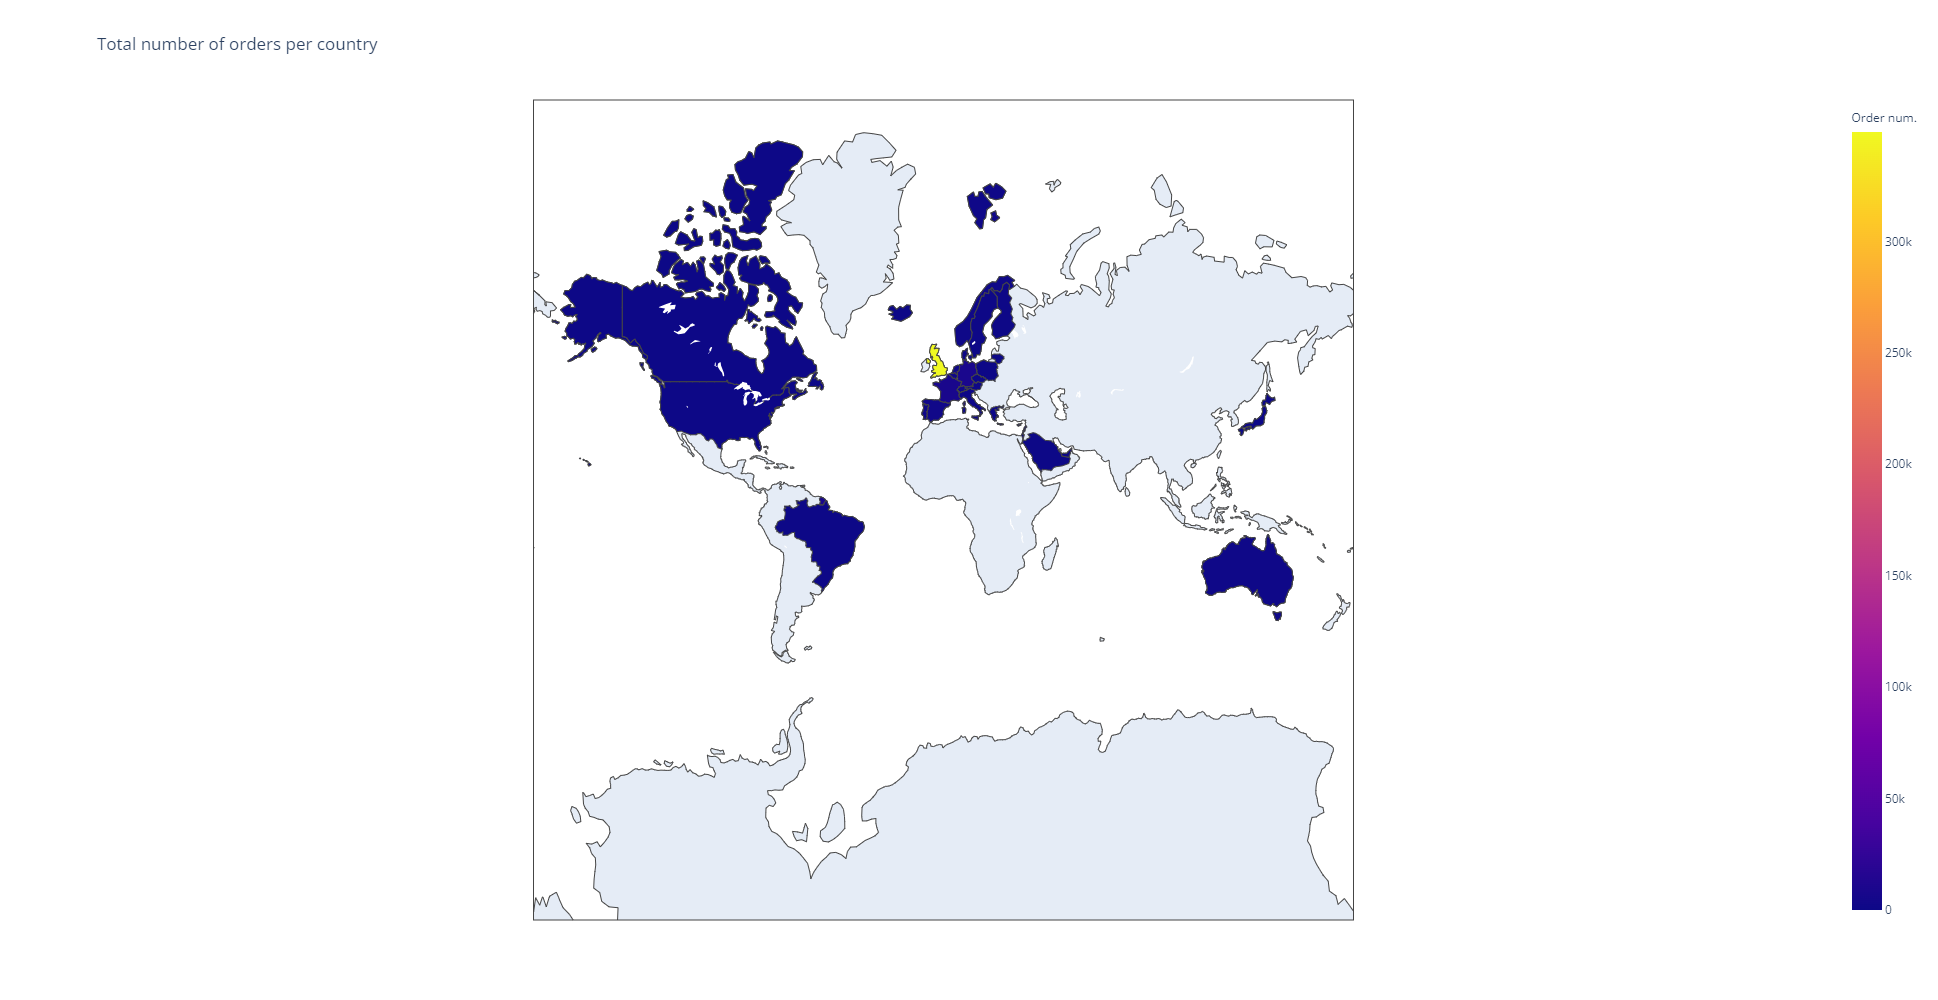

In [28]:
# Get orders counts of countries
countries = df['Country'].value_counts()

# Prepare data dictionary for choropleth map
data = dict(type='choropleth', locations=countries.index, locationmode='country names', z=countries, text=countries.index, colorbar={'title': 'Order num.'})

# Define layout for choropleth map
layout = dict(title='Total number of orders per country', geo=dict(showframe=True, projection={'type': 'mercator'}), width=1000, height=1000)

# Create choropleth map figure
choromap = go.Figure(data=[data], layout=layout)

# Display the choropleth map
iplot(choromap, validate=False)

In [29]:
# Create revenue column 
df["Revenue"] = df["UnitPrice"] * df["Quantity"]
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
468925,576560,23507,MINI PLAYING CARDS BUFFALO BILL,2,2011-11-15 13:21:00,0.42,12877,United Kingdom,0.84
110714,545695,22980,PANTRY SCRUBBING BRUSH,6,2011-03-06 14:15:00,1.65,17050,United Kingdom,9.90
504733,578993,23119,PACK OF 6 LARGE FRUIT STRAWS,1,2011-11-27 15:38:00,0.62,15987,United Kingdom,0.62
371824,569228,22712,CARD DOLLY GIRL,12,2011-10-02 14:47:00,0.42,15547,United Kingdom,5.04
441681,574619,23109,PACK OF SIX LED TEA LIGHTS,6,2011-11-06 11:18:00,2.89,15952,United Kingdom,17.34
173100,551654,22423,REGENCY CAKESTAND 3 TIER,16,2011-05-03 12:04:00,10.95,16837,United Kingdom,175.20
437335,574287,22155,STAR DECORATION RUSTIC,1,2011-11-03 15:09:00,0.42,14723,United Kingdom,0.42
350696,567656,20723,STRAWBERRY CHARLOTTE BAG,3,2011-09-21 14:40:00,1.63,14096,United Kingdom,4.89
291393,562450,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,2011-08-05 08:40:00,2.95,12562,France,17.70
289831,562313,21915,RED HARMONICA IN BOX,12,2011-08-04 11:38:00,1.25,14640,United Kingdom,15.00


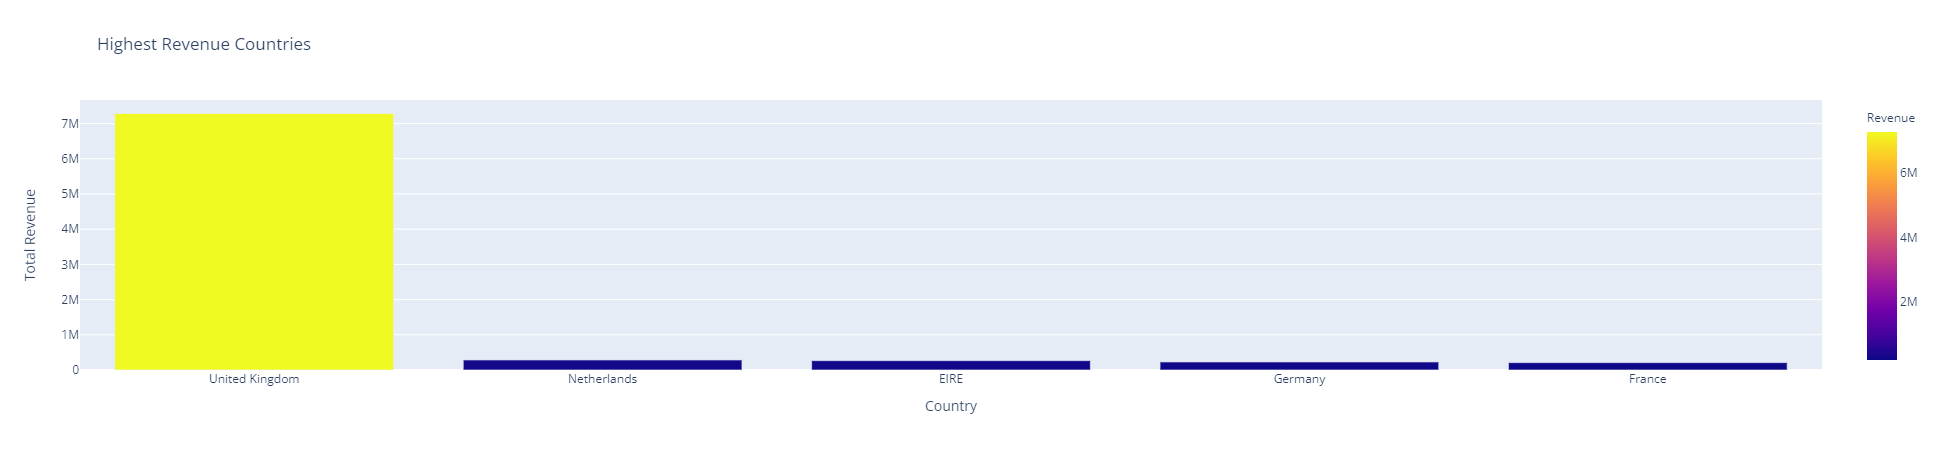

In [30]:
# Group by country and calculate total revenue
highest_revenue_countries = df.groupby(['Country'])['Revenue'].sum().reset_index()
highest_revenue_countries = highest_revenue_countries.sort_values(by=["Revenue"], ascending=False)

# Plotly bar plot
fig = px.bar(highest_revenue_countries.head(5), x='Country', y='Revenue', color='Revenue', title="Highest Revenue Countries")
fig.update_xaxes(title="Country")
fig.update_yaxes(title="Total Revenue")
fig.show()

Number of Products

In [31]:
# Print total number of unique products
print("Total number of Products:\n" + str(df["StockCode"].nunique()))

Total number of Products:
3665


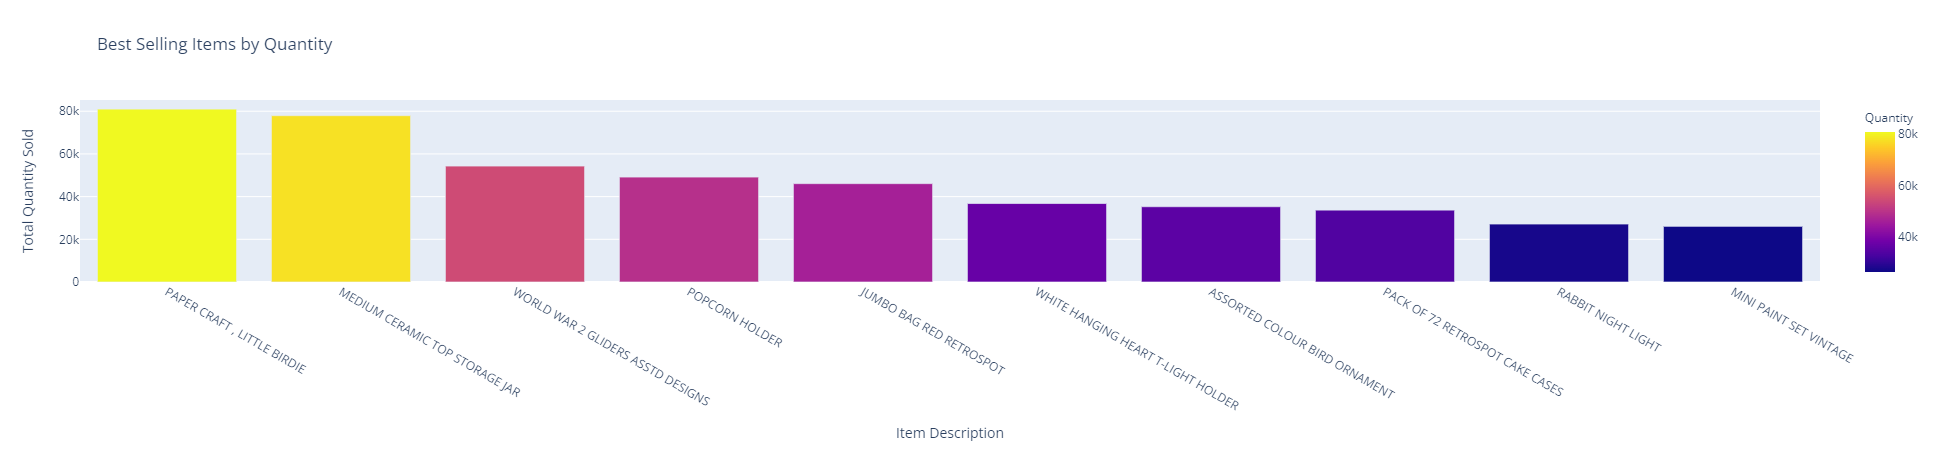

In [32]:
# Group by item name and calculate total quantity sold
most_sold_items = df.groupby(['Description'])['Quantity'].sum().reset_index()
most_sold_items = most_sold_items.sort_values(by=["Quantity"], ascending=False)

# Plotly bar plot
fig = px.bar(most_sold_items.head(10), x='Description', y='Quantity', color='Quantity', title="Best Selling Items by Quantity",)
fig.update_xaxes(title="Item Description")
fig.update_yaxes(title="Total Quantity Sold")
fig.show()

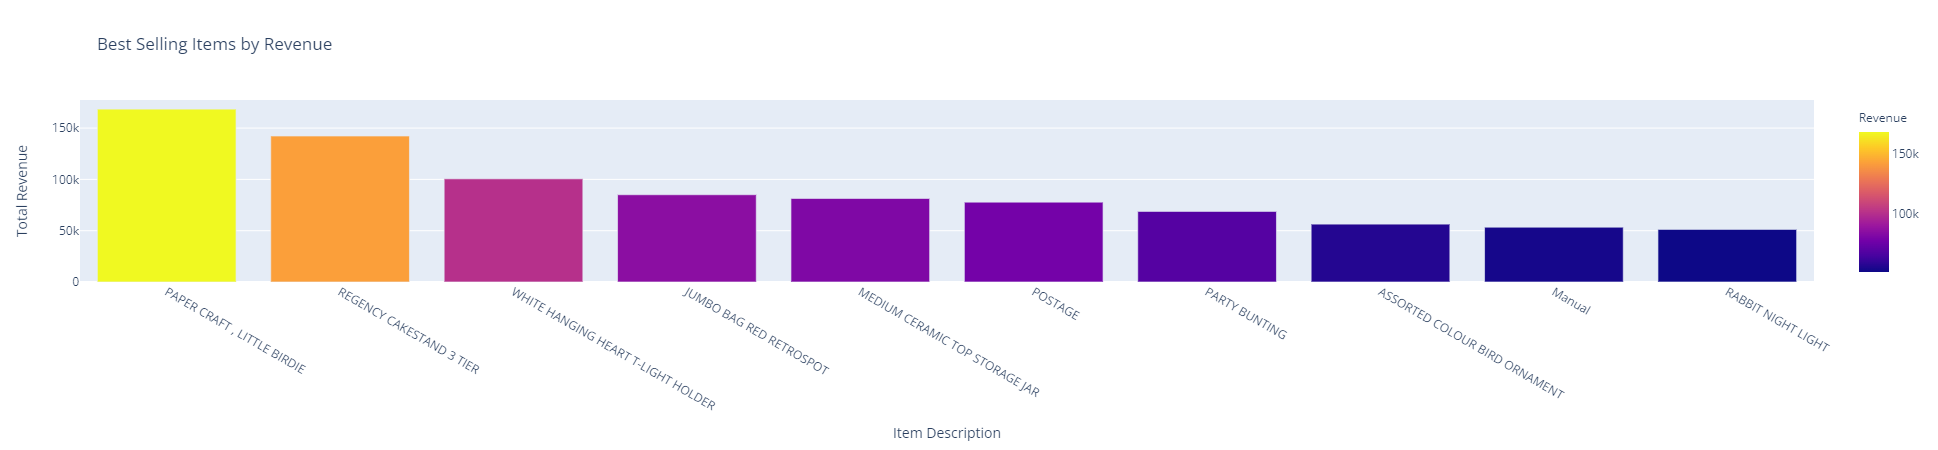

In [33]:
# Group by item name and calculate total quantity sold
most_sold_items = df.groupby(['Description'])['Revenue'].sum().reset_index()
most_sold_items = most_sold_items.sort_values(by=["Revenue"], ascending=False)

# Plotly bar plot
fig = px.bar(most_sold_items.head(10), x='Description', y='Revenue', color='Revenue', title="Best Selling Items by Revenue",)
fig.update_xaxes(title="Item Description")
fig.update_yaxes(title="Total Revenue")
fig.show()

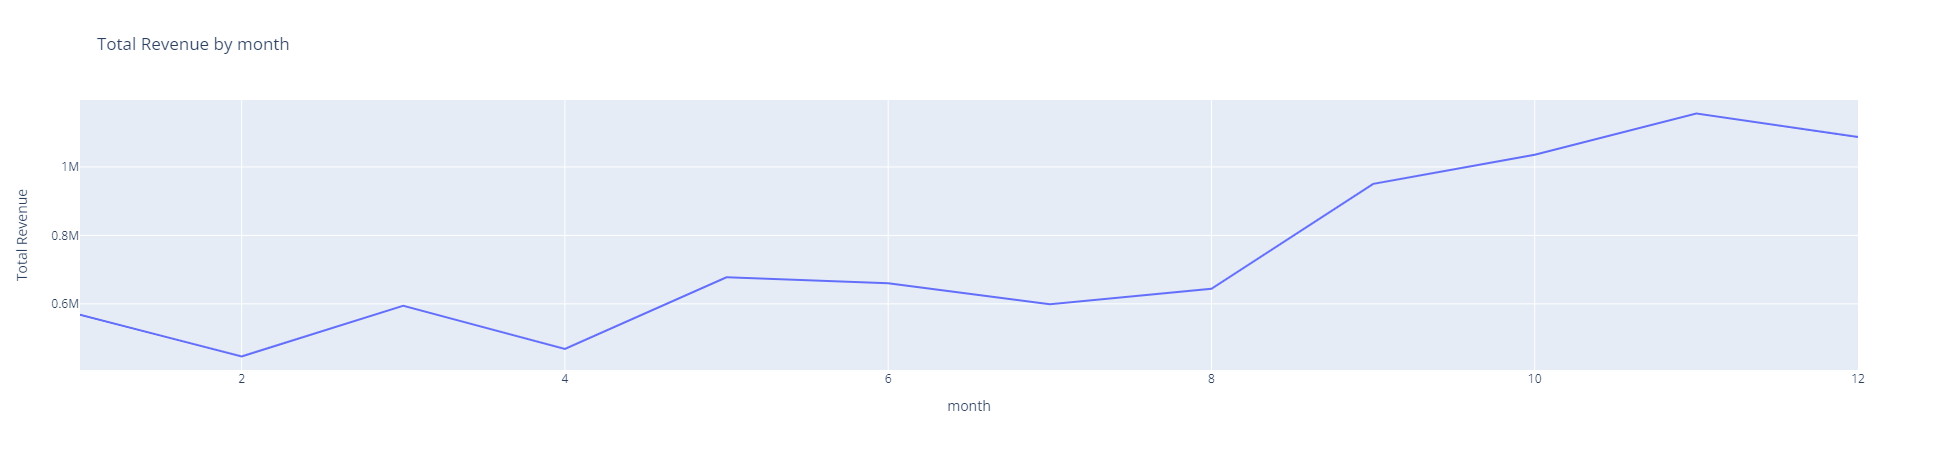

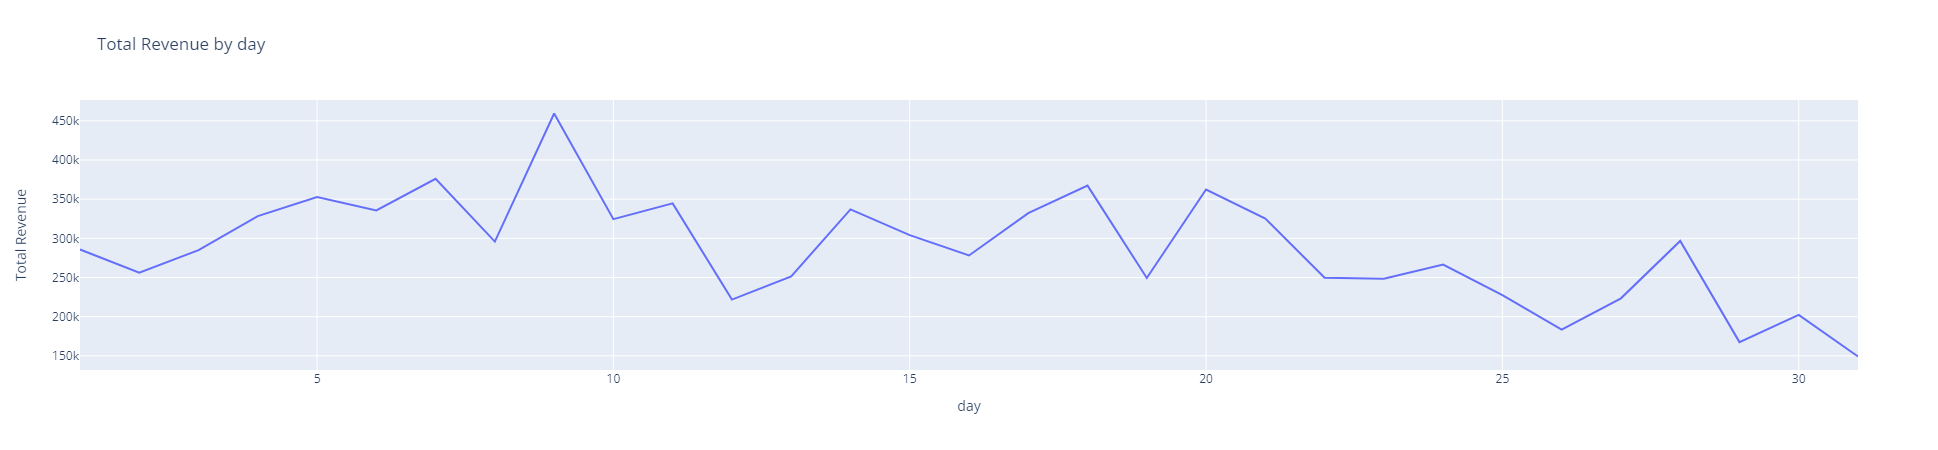

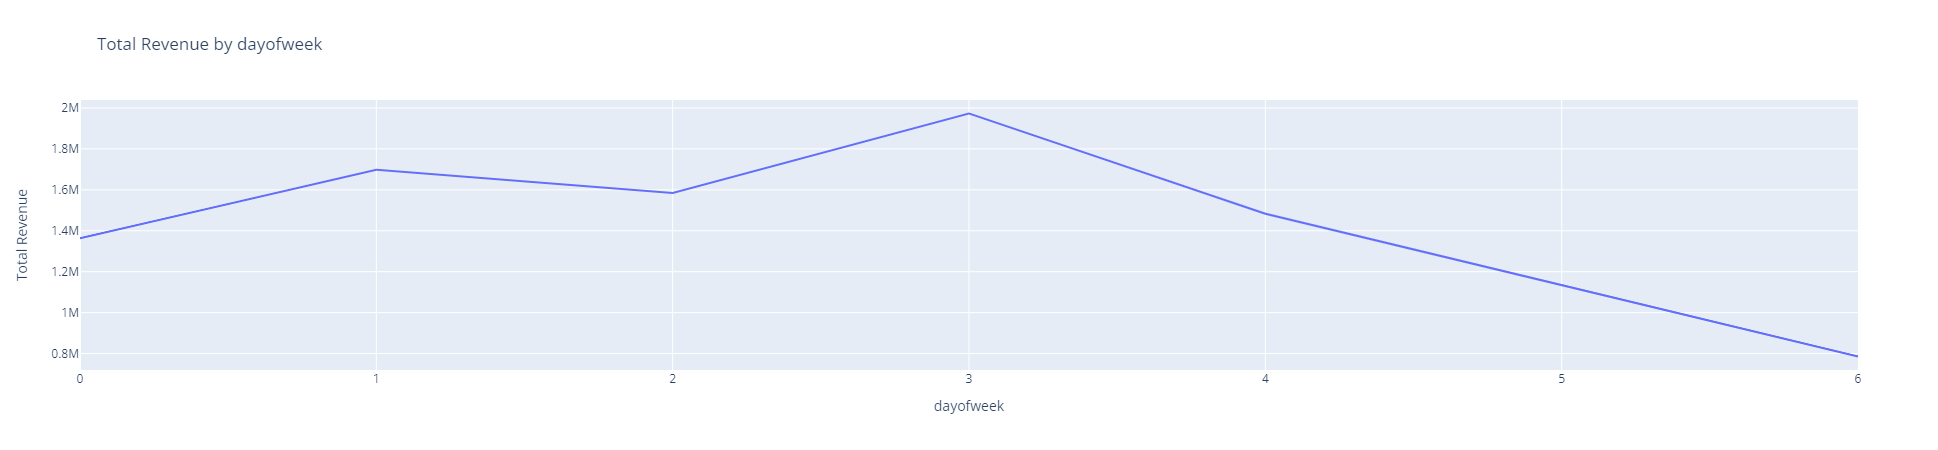

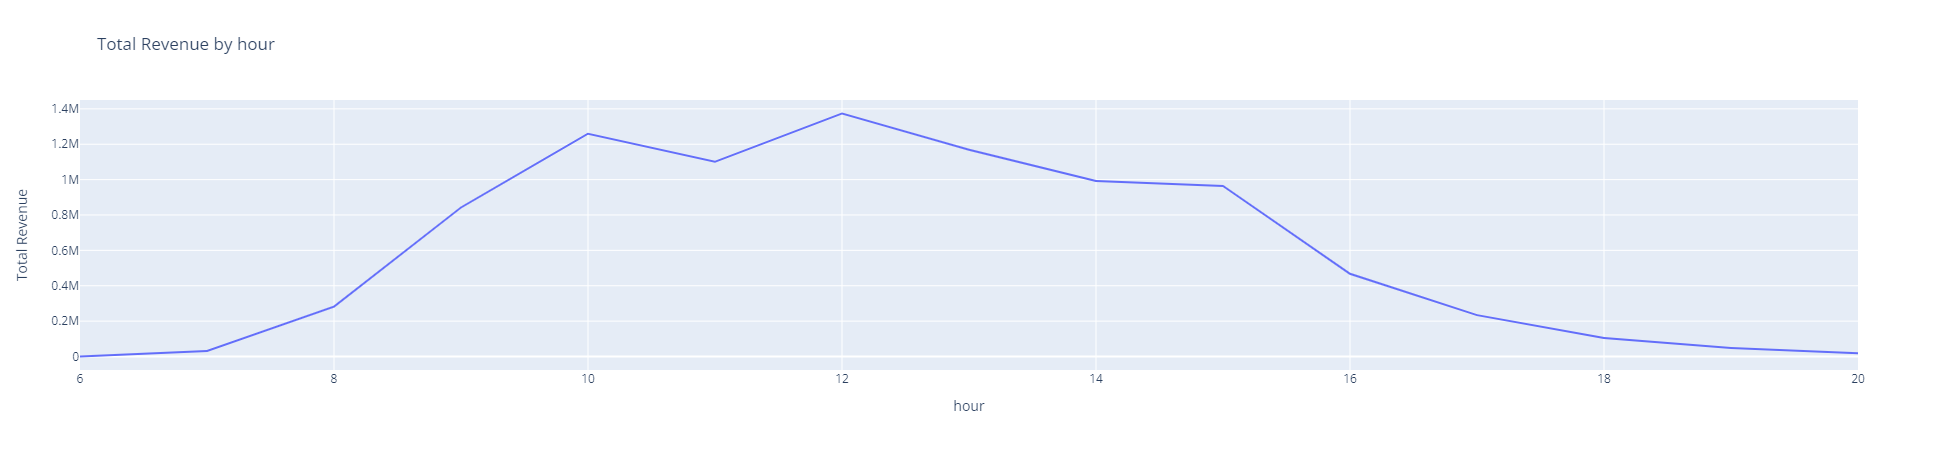

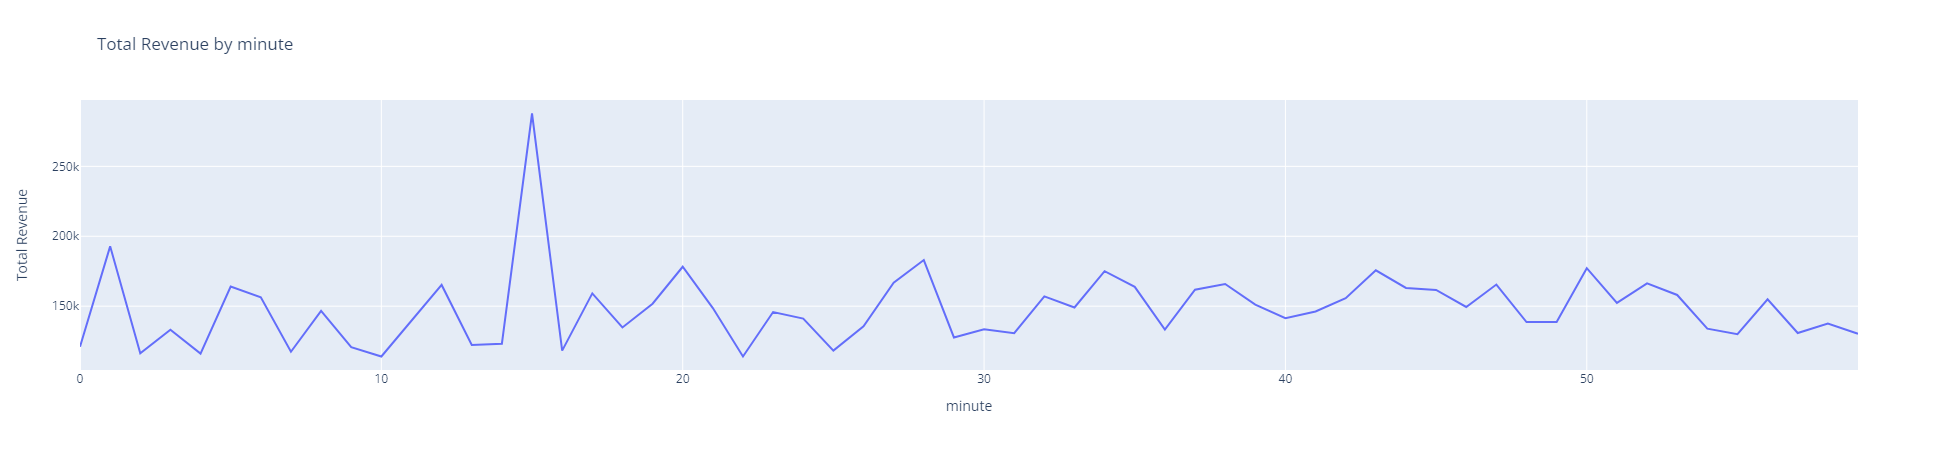

In [34]:
# Exploratory statistics using Plotly on Revenue
exploratory_columns = ['month', 'day', 'dayofweek', 'hour', 'minute']

for column in exploratory_columns:
    temp = df.groupby(df['InvoiceDate'].dt.__getattribute__(column))['Revenue'].sum()
    fig = px.line(temp, x=temp.index, y='Revenue', title=f'Total Revenue by {column}')
    fig.update_layout(yaxis_title='Total Revenue', xaxis_title=column)
    fig.show()

Number of clients

In [35]:
# Print total number of unique clients
print("Total number of clients:\n" + str(df["CustomerID"].nunique()))

Total number of clients:
4338


In [36]:
# Group by customer and calculate total quantity and revenue
customer_summary = df.groupby(['CustomerID'])[['Quantity', 'Revenue']].sum().reset_index()

# Sort customers by quantity and revenue
sorted_by_quantity = customer_summary.sort_values(by=["Quantity"], ascending=False)
sorted_by_revenue = customer_summary.sort_values(by=["Revenue"], ascending=False)

# Select top customers by quantity and revenue
top_customers_by_quantity = sorted_by_quantity.head(10)
top_customers_by_revenue = sorted_by_revenue.head(10)

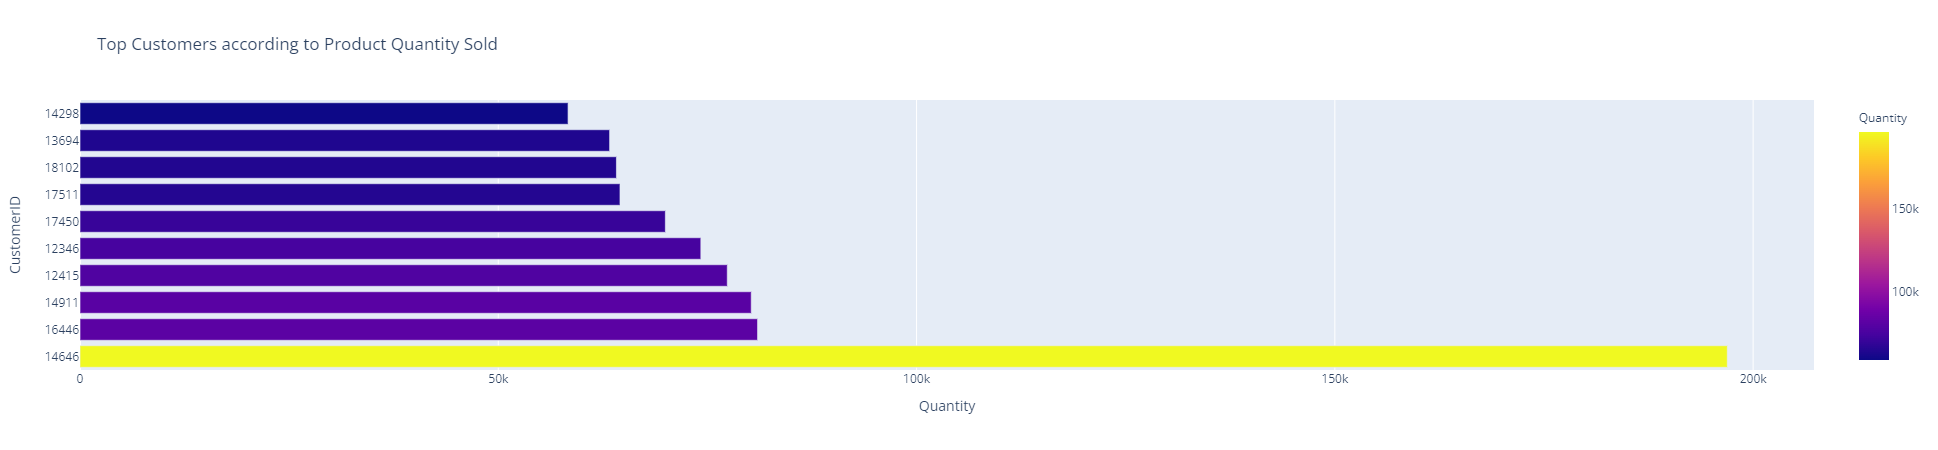

In [37]:
# Horizontal bar plot for top customers by quantity
fig_quantity = px.bar(top_customers_by_quantity, x="Quantity", y="CustomerID", color="Quantity", orientation='h', title="Top Customers according to Product Quantity Sold")
fig_quantity.update_xaxes(title="Quantity")
fig_quantity.update_yaxes(title="CustomerID", type = 'category')
fig_quantity.show()

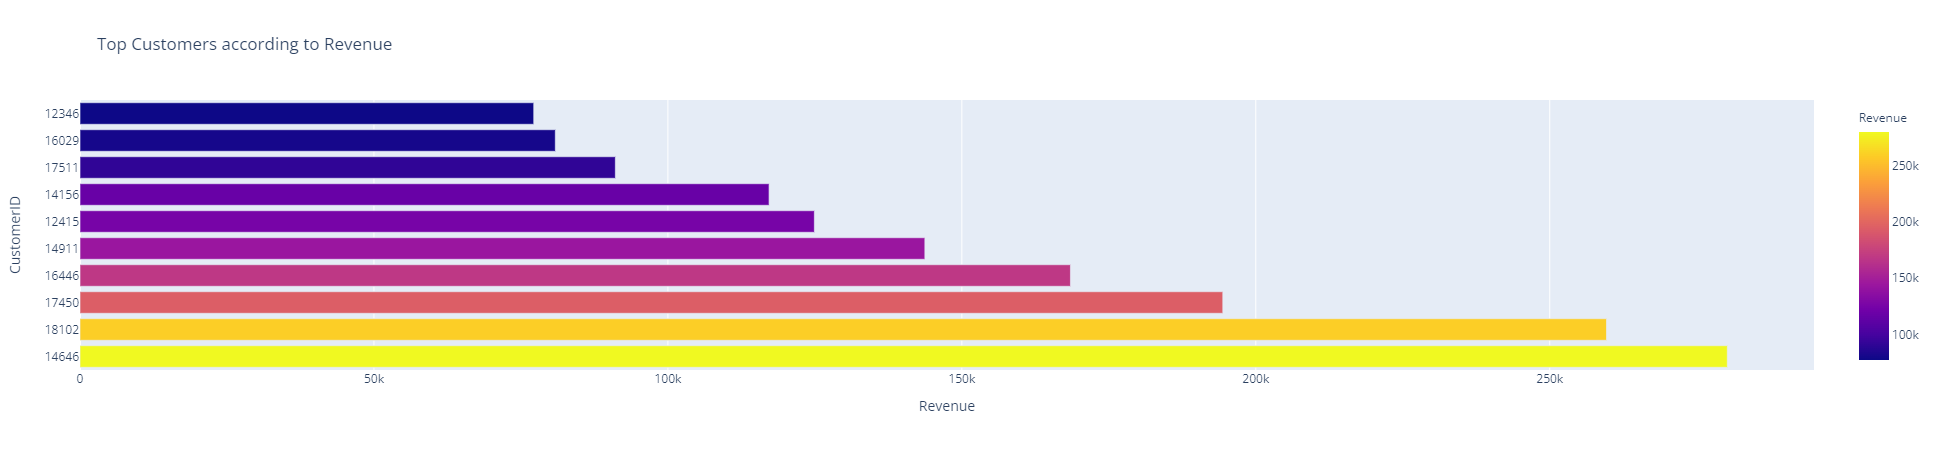

In [38]:
# Horizontal bar plot for top customers by revenue
fig_revenue = px.bar(top_customers_by_revenue, x="Revenue", y="CustomerID", color="Revenue", orientation='h', title="Top Customers according to Revenue")
fig_revenue.update_xaxes(title="Revenue")
fig_revenue.update_yaxes(title="CustomerID", type = 'category')
fig_revenue.show()

Number of Orders

In [39]:
# Display the total number of unique invoice numbers
print("Total number of Orders:\n" + str(df["InvoiceNo"].nunique()))

Total number of Orders:
18532


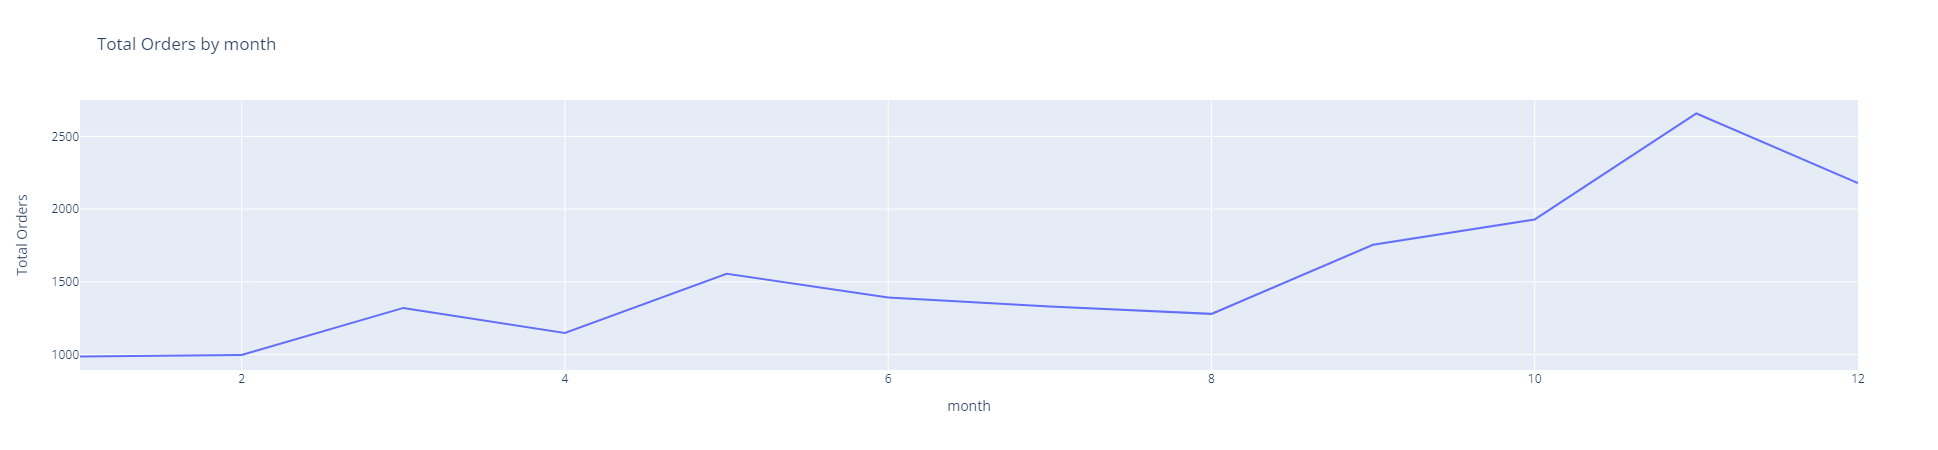

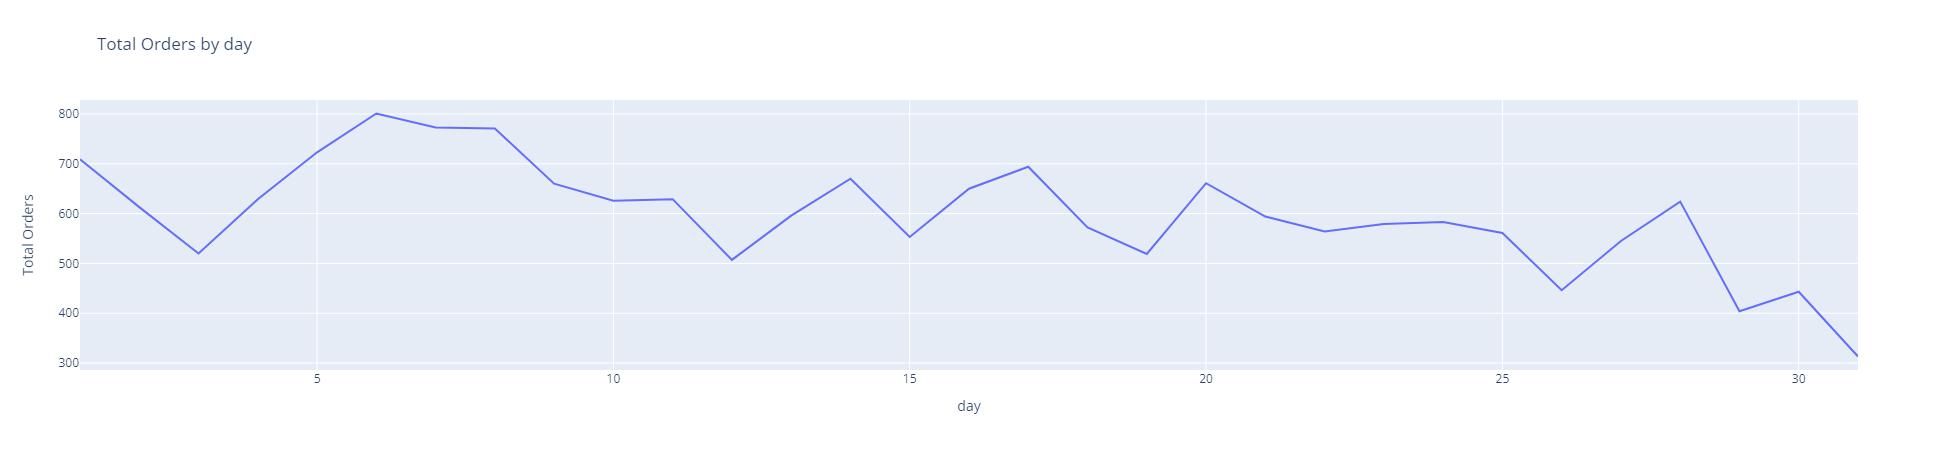

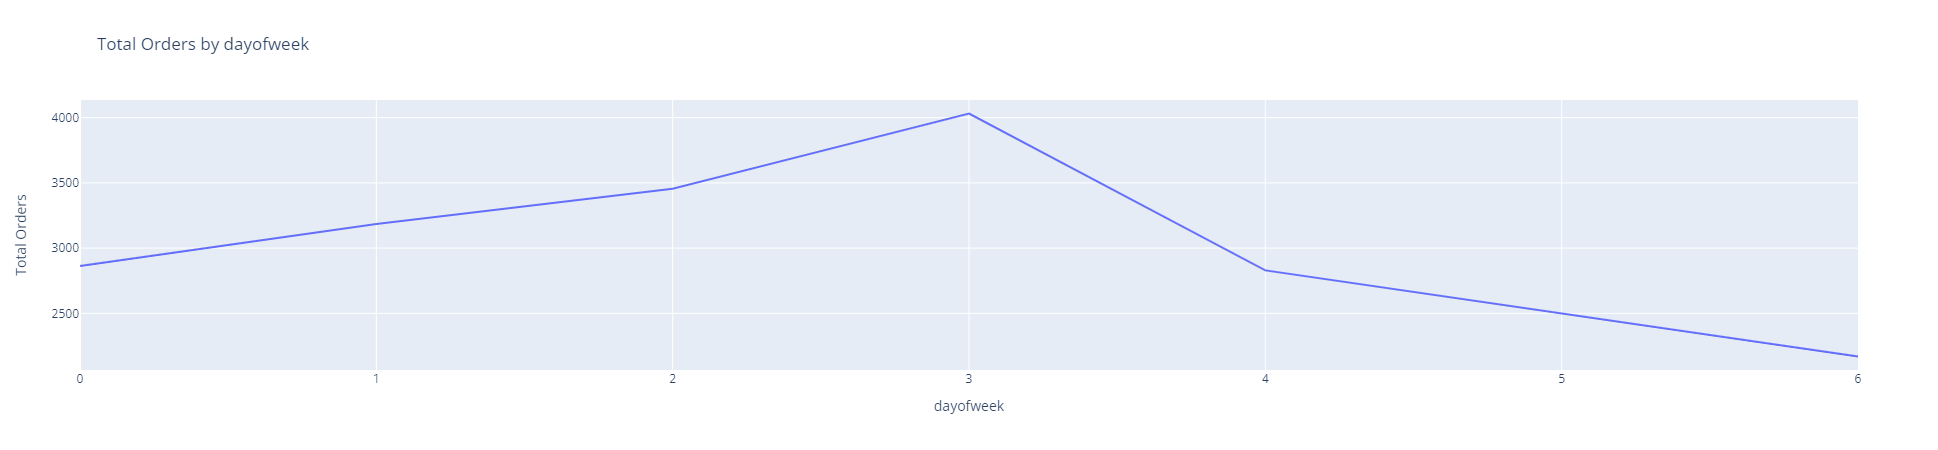

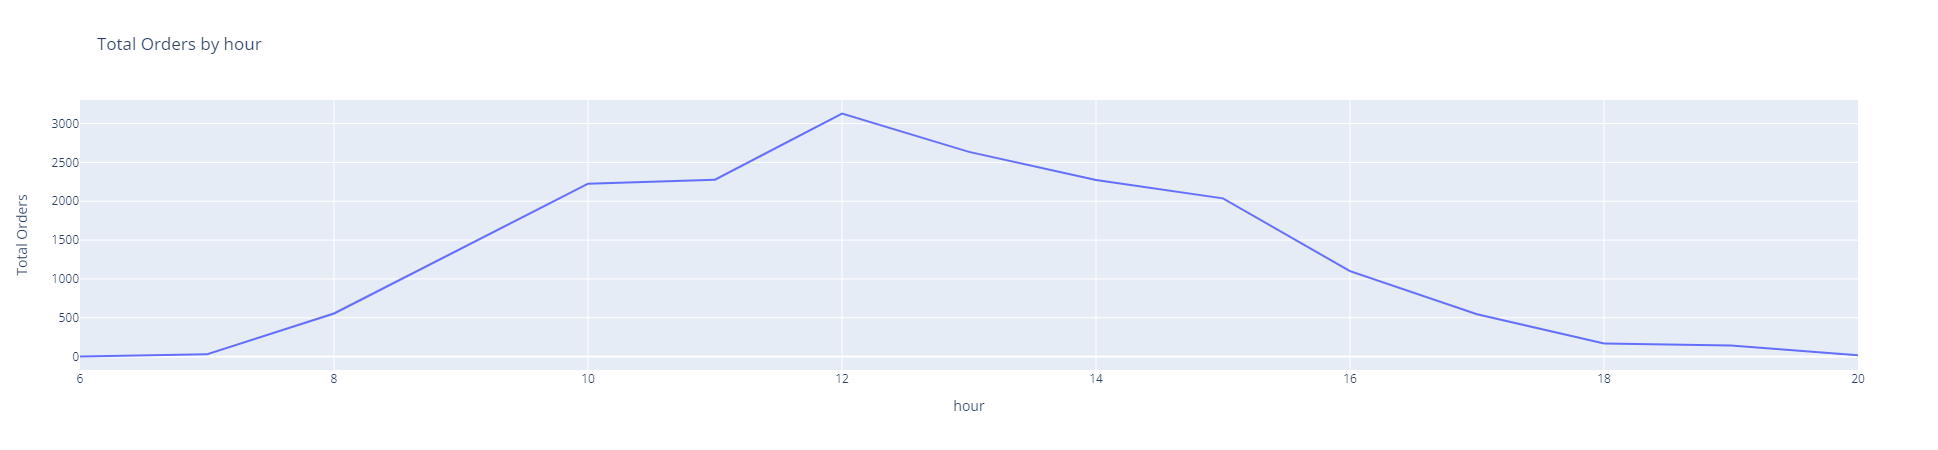

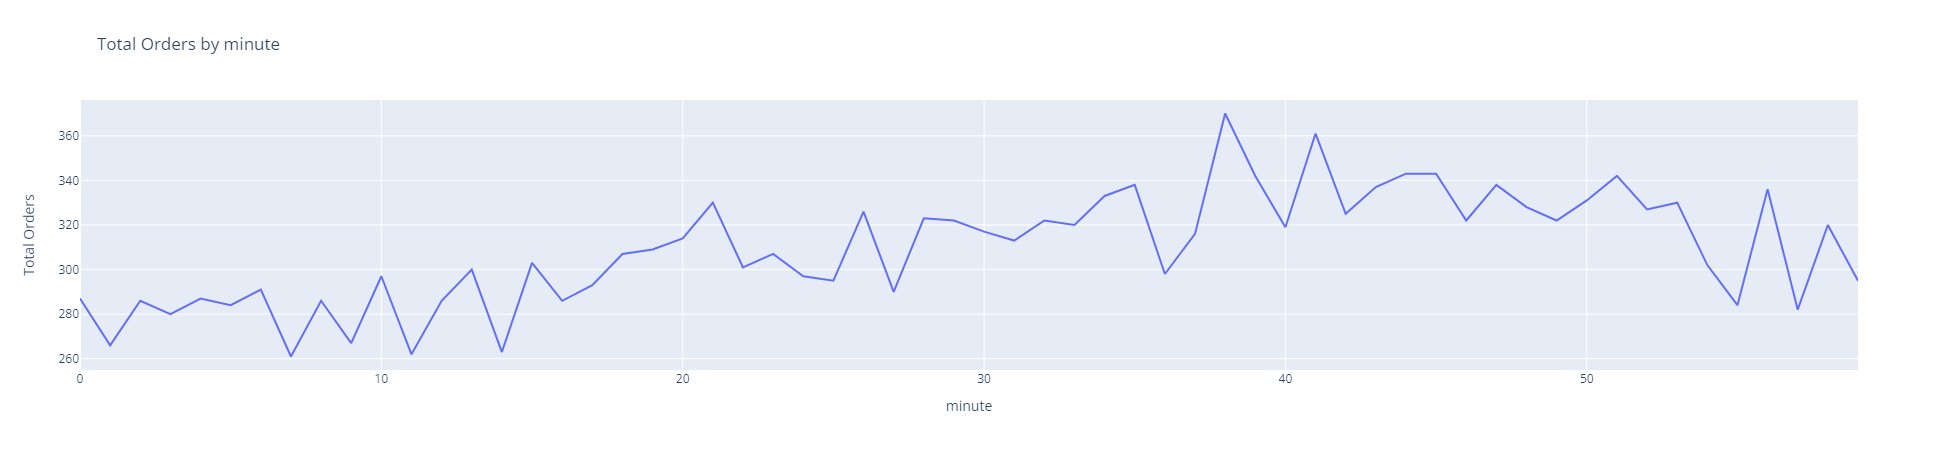

In [40]:
# Exploratory statistics using Plotly on number of orders
exploratory_columns = ['month', 'day', 'dayofweek', 'hour', 'minute']

for column in exploratory_columns:
    temp = df.groupby(df['InvoiceDate'].dt.__getattribute__(column))['InvoiceNo'].nunique()
    fig = px.line(temp, x=temp.index, y='InvoiceNo', title=f'Total Orders by {column}')
    fig.update_layout(yaxis_title='Total Orders', xaxis_title=column)
    fig.show()

# Recommendations

## Recommended For You

### Data Transformation

In [41]:
# Sort the data using the Date
df = df.sort_values('InvoiceDate')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED RETROSPOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047,United Kingdom,14.85


In [42]:
# Split data into past and future purchases
split_date = df['InvoiceDate'].max() - pd.DateOffset(days=30)
past_data = df[df['InvoiceDate'] <= split_date]
future_data = df[df['InvoiceDate'] > split_date]

In [43]:
# Create a user-item matrix for past data
user_item_matrix = past_data.pivot_table(index='CustomerID', columns='Description', values='Quantity', fill_value=0)
user_item_matrix

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0
12347,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0
12348,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0
12350,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0
12352,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0
18281,0.0,0,0.0,0.0,0,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0
18282,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0


### Cosine Similarity

In [44]:
# Compute cosine similarity matrix between users
user_similarity = cosine_similarity(user_item_matrix)

### Evaluation

In [45]:
# Function to get recommendations for a user based on past data
def get_recommendations_cosine(user_id, num_recommendations = 5):
    user_index = user_item_matrix.index.get_loc(user_id)
    user_similarities = user_similarity[user_index]

    # Calculate recommendation scores based on past data
    recommendation_scores = user_similarities.dot(user_item_matrix.values)

    # Get top recommended items
    recommended_indices = recommendation_scores.argsort()[-num_recommendations:][::-1]
    return user_item_matrix.columns[recommended_indices]

In [46]:
# Find user IDs present in both past and future datasets
common_user_ids = set(past_data['CustomerID']).intersection(set(future_data['CustomerID']))

In [47]:
# Choose a random user ID from the common set
random_user_id = random.choice(list(common_user_ids))

# Evaluate recommendations for the randomly selected user
past_recommendations = get_recommendations_cosine(random_user_id)
actual_future_purchases = future_data[future_data['CustomerID'] == random_user_id]['Description'].unique()
correct_recommendations = set(past_recommendations) & set(actual_future_purchases)

# Calculate precision and recall
true_positives = len(set(past_recommendations) & set(actual_future_purchases))
precision = true_positives / len(past_recommendations)
recall = true_positives / len(actual_future_purchases)

print("Evaluation for Randomly Selected User ID:", random_user_id)
print("------------------------------------------------")
print("Past Recommendations:")
for i, recommendation in enumerate(past_recommendations, start=1):
    print(f"{i}. {recommendation}")

print("\nActual Future Purchases:")
for i, purchase in enumerate(actual_future_purchases, start=1):
    print(f"{i}. {purchase}")

print("\nCorrect Recommendations:")
for i, recommendation in enumerate(correct_recommendations, start=1):
    print(f"{i}. {recommendation}")

print("\nMetrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Evaluation for Randomly Selected User ID: 13835
------------------------------------------------
Past Recommendations:
1. PACK OF 72 RETROSPOT CAKE CASES
2. TRAVEL CARD WALLET KEEP CALM
3. HOMEMADE JAM SCENTED CANDLES
4. WORLD WAR 2 GLIDERS ASSTD DESIGNS
5. JUMBO BAG RED RETROSPOT

Actual Future Purchases:
1. MEMO BOARD COTTAGE DESIGN
2. WHITE HANGING HEART T-LIGHT HOLDER
3. NATURAL HANGING QUILTED HEARTS 
4. CHARLOTTE BAG SUKI DESIGN
5. IVORY WICKER HEART LARGE
6. 15CM CHRISTMAS GLASS BALL 20 LIGHTS

Correct Recommendations:

Metrics:
Precision: 0.00
Recall: 0.00


In [48]:
# Calculate MAP and aggregated precision and recall for all common user IDs
total_average_precision = 0
num_users_evaluated = 0
total_true_positives = 0
total_past_recommendations = 0
total_actual_future_purchases = 0

for user_id in common_user_ids:
    past_recommendations = get_recommendations_cosine(user_id)
    actual_future_purchases = future_data[future_data['CustomerID'] == user_id]['Description'].unique()

    # Calculate average precision for the user
    average_precision = 0
    num_correct_recommendations = 0
    for i, recommendation in enumerate(past_recommendations, start=1):
        if recommendation in actual_future_purchases:
            num_correct_recommendations += 1
            average_precision += num_correct_recommendations / i
    if num_correct_recommendations > 0:
        average_precision /= num_correct_recommendations

    total_average_precision += average_precision
    num_users_evaluated += 1

    # Calculate precision and recall for the user
    true_positives = len(set(past_recommendations) & set(actual_future_purchases))
    total_true_positives += true_positives
    total_past_recommendations += len(past_recommendations)
    total_actual_future_purchases += len(actual_future_purchases)

# Calculate metrics
mean_average_precision = total_average_precision / num_users_evaluated
total_precision = total_true_positives / total_past_recommendations
total_recall = total_true_positives / total_actual_future_purchases

# Print results
print("\nOverall Model Metrics:")
print("----------------------")
print(f"Mean Average Precision: {mean_average_precision:.2f}")
print(f"Total Precision: {total_precision:.2f}")
print(f"Total Recall: {total_recall:.2f}")


Overall Model Metrics:
----------------------
Mean Average Precision: 0.34
Total Precision: 0.16
Total Recall: 0.02


Based on the evaluation results, we can gain insights into the strengths and weaknesses of the recommendation engine:

**Strengths:**

* Mean Average Precision (MAP): The Mean Average Precision measures the overall quality of the recommendations across all users. In our case, the MAP is 0.34, which indicates that, on average, the recommendations are somewhat accurate and relevant.

* Precision: Precision is the proportion of correct recommendations out of all recommendations made. The total precision of 0.16 suggests that when recommendations are made, there's a reasonable chance that some of them are correct.

**Weaknesses:**

* Recall: Recall is the proportion of correct recommendations out of all the items that a user actually purchased in the future. The total recall of 0.02 indicates that the engine has a low ability to capture all the items a user might purchase in the future.

* Mean Average Precision (MAP): While the MAP is relatively decent, it's not extremely high. This suggests that the engine's ability to recommend items that the user will purchase in the future is still moderate.

* Overall Performance: The overall precision and recall values are relatively low. This suggests that there is room for improvement in the recommendations. The engine might be missing out on many potential future purchases by users.

**Insights:**

* The recommendation engine seems to provide suggestions that are somewhat relevant on average. However, improvements could be made to increase the overall accuracy and relevance of recommendations.

* The engine struggles with recall, meaning that it's not effectively capturing a user's entire range of future purchase behavior. This could be due to various reasons such as the sparsity of data, the lack of user behavior patterns, or the limitations of the algorithm.

* It might be beneficial to explore more advanced recommendation algorithms, such as collaborative filtering techniques, matrix factorization, or deep learning-based models. These methods could potentially capture more intricate patterns in user behavior and improve the overall quality of recommendations.

* We can consider using more user features and contextual data if available, as these could help personalize recommendations better and capture individual preferences more accurately.

* It's also important to note that the evaluation is based on past recommendations and future purchases. The results might vary based on the specific dataset and the chosen evaluation methodology.

In conclusion, while the recommendation engine has some strengths, it also has areas that need improvement. Experimenting with different algorithms, leveraging additional data, and fine-tuning parameters could lead to more accurate and relevant recommendations.

### Download for deployment

In [49]:
# convert to csv and save
past_data.to_csv('past_data.csv')
future_data.to_csv('future_data.csv')

## Similar Items

### Transformation

In [50]:
# Create a user-item matrix (rows = customers, columns = items)
user_item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)
user_item_matrix

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,0.00
12347,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,0.00
12348,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,2.25
12349,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,1.00
12350,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,0.00
18281,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,0.00
18282,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,0.00


### Calculate Similarity

In [51]:
# Convert DataFrame to numpy array
user_item_array = user_item_matrix.to_numpy()

# Calculate the item-item Jaccard similarity using pairwise_distances
item_item_similarity = 1 - pairwise_distances(user_item_array.T, metric='jaccard')

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning:

Data was converted to boolean for metric jaccard



### Evaluation

In [52]:
# define function to recommend similar items and returns a df of similar items
def recommend_similar_items(item_id, n=10):
    item_index = user_item_matrix.columns.get_loc(item_id)
    similar_items_indices = item_item_similarity[item_index].argsort()[::-1][1:n+1]
    similar_item_codes = list(user_item_matrix.columns[similar_items_indices])
    
    # Create a DataFrame with stock code and description of similar items
    similar_items_df = df[df['StockCode'].isin(similar_item_codes)][['StockCode', 'Description']]
    similar_items_df = similar_items_df.drop_duplicates(subset=['StockCode']).reset_index(drop=True)
    
    return similar_items_df

In [53]:
# Example usage
item_id = '85123A'
recommended_items_df = recommend_similar_items(item_id, n=10)
print("Recommended similar items for", item_id, ":\n", recommended_items_df)

Recommended similar items for 85123A :
   StockCode                        Description
0     84879      ASSORTED COLOUR BIRD ORNAMENT
1    82494L        WOODEN FRAME ANTIQUE WHITE 
2     82482  WOODEN PICTURE FRAME WHITE FINISH
3     21733   RED HANGING HEART T-LIGHT HOLDER
4     22470              HEART OF WICKER LARGE
5     22457    NATURAL SLATE HEART CHALKBOARD 
6     22469              HEART OF WICKER SMALL
7     22804    CANDLEHOLDER PINK HANGING HEART
8     47566                      PARTY BUNTING
9     23321        SMALL WHITE HEART OF WICKER


In [54]:
# Example usage
item_id = 'POST'
recommended_items_df = recommend_similar_items(item_id, n=10)
print("Recommended similar items for", item_id, ":\n", recommended_items_df)

Recommended similar items for POST :
   StockCode                          Description
0     21731        RED TOADSTOOL LED NIGHT LIGHT
1     22631             CIRCUS PARADE LUNCH BOX 
2     22326  ROUND SNACK BOXES SET OF4 WOODLAND 
3     22629                  SPACEBOY LUNCH BOX 
4     20750             RED RETROSPOT MINI CASES
5     22328   ROUND SNACK BOXES SET OF 4 FRUITS 
6     22551             PLASTERS IN TIN SPACEBOY
7     22554     PLASTERS IN TIN WOODLAND ANIMALS
8     22556       PLASTERS IN TIN CIRCUS PARADE 
9     20719               WOODLAND CHARLOTTE BAG


In [55]:
# Evaluate the recommendation engine
precision_scores = []
recall_scores = []
map_scores = []

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle = True, random_state=42)

for customer_id in test_data['CustomerID'].unique():
    user_test_data = test_data[test_data['CustomerID'] == customer_id]
    
    true_interactions = set(user_test_data['StockCode'])
    
    recommended_items_df = recommend_similar_items(user_test_data['StockCode'].iloc[0], n=10)
    recommended_items = set(recommended_items_df['StockCode'])
    
    common_items = true_interactions.intersection(recommended_items)  # Common items between true and recommended
    if len(common_items) > 0:
        precision = len(common_items) / len(recommended_items)
        recall = len(common_items) / len(true_interactions)
        
        # Calculate Average Precision
        true_labels = [1 if item in true_interactions else 0 for item in recommended_items_df['StockCode']]
        avg_precision = average_precision_score(true_labels, recommended_items_df.index)
        
        precision_scores.append(precision)
        recall_scores.append(recall)
        map_scores.append(avg_precision)

avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_map = sum(map_scores) / len(map_scores)

# Print results
print("\nOverall Model Metrics:")
print("----------------------")
print(f"Mean Average Precision: {avg_map:.2f}")
print(f"Total Precision: {avg_precision:.2f}")
print(f"Total Recall: {avg_recall:.2f}")


Overall Model Metrics:
----------------------
Mean Average Precision: 0.32
Total Precision: 0.17
Total Recall: 0.14


The recommendation engine is using item-item similarity to recommend similar items to users. The evaluation metrics provide insights into its performance:

**Strengths:**

* Mean Average Precision (MAP): The MAP value of 0.32 indicates that, on average, the recommended items are ranked well, and relevant items tend to appear higher in the list.

* Precision (Total Precision): The precision value of 0.17 means that around 17% of the recommended items were actually relevant to the user. This indicates that the engine is producing a reasonable proportion of relevant recommendations.

* Recall (Total Recall): The recall value of 0.14 means that the engine is able to capture around 14% of the relevant items for each user. This is a good indicator that the engine is not missing too many relevant items.

**Weaknesses:**

* Low Precision and Recall: The precision and recall values are relatively low. This suggests that while the engine is providing some relevant recommendations, there's still room for improvement in terms of identifying more relevant items for users.

* Bias Toward Popular Items: If the engine predominantly recommends popular items, it might not provide personalized recommendations to all users, especially those with niche interests.

* Cold Start Problem: The engine might struggle to provide accurate recommendations for new or rarely-seen items. This is because there might not be enough data to establish meaningful similarity for such items.

* Limited Exploration: The engine relies on the current user's interactions and might not effectively explore diverse recommendations beyond the user's existing preferences.

**Improvement Strategies:**

* Hybrid Approaches: Combine item-item similarity with other recommendation techniques like collaborative filtering or content-based filtering to enhance the quality of recommendations.

* Matrix Factorization: Use matrix factorization techniques like Singular Value Decomposition (SVD) to identify latent factors influencing user preferences, which can lead to better recommendations.

* Personalization: Implement techniques that personalize recommendations based on user behavior, demographics, or context to provide more relevant suggestions.

* Diversity and Serendipity: Introduce diversity-aware recommendation strategies to ensure a mix of popular and niche items in recommendations, enhancing user exploration.

* Real-time Data: Incorporate real-time data to improve recommendations and handle changes in user preferences more effectively.

* Cold Start Solutions: For new users or items, consider using content-based recommendations or hybrid approaches until sufficient interactions are available for accurate item-item similarity.

By addressing these weaknesses and adopting the improvement strategies, we can enhance the recommendation engine's performance and provide more accurate and valuable recommendations to users.

### Download for deployment

In [56]:
# Map item codes to descriptions
item_mapping = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')
item_mapping

,Description
StockCode,
85123A,WHITE HANGING HEART T-LIGHT HOLDER
71053,WHITE METAL LANTERN
84406B,CREAM CUPID HEARTS COAT HANGER
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...
90214W,"LETTER ""W"" BLING KEY RING"
90214Z,"LETTER ""Z"" BLING KEY RING"
90214T,"LETTER ""T"" BLING KEY RING"


In [57]:
# Save the similarity matrices to a compressed file
np.savez_compressed('item_item_similarity.npz', data=item_item_similarity)

# convert to csv and save
user_item_matrix.to_csv('user_item_matrix.csv')
item_mapping.to_csv('item_mapping.csv')

## Frequently Bought Together

### Transformation

In [58]:
# Create a one-hot encoded matrix for frequent itemset mining
basket = df.pivot_table(index='InvoiceNo', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)
basket_sets = basket.applymap(lambda x: True if x > 0 else False)
basket_sets.sample(10)

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
564723,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
549937,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
563509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
560604,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
546156,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
542393,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
547667,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581176,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
547939,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Apriori Algorithm

In [59]:
# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.017483,(15036)
1,0.015703,(15056BL)
2,0.020397,(15056N)
3,0.013382,(16161P)
4,0.011116,(17003)
...,...,...
1026,0.011116,"(23209, 23202, 23203)"
1027,0.012195,"(23202, 23203, 85099B)"
1028,0.010900,"(23209, 23203, 85099B)"
1029,0.010414,"(20728, 22384, 20727, 20725)"


In [62]:
# Generate association rules and sort it
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.drop_duplicates(['support'], inplace=True)
rules = rules.sort_values(by='lift', ascending=False)

# convert the frozen sets to comma seperated strings
rules['consequents'] = rules['consequents'].apply(lambda x: ','.join(x))
rules['antecedents'] = rules['antecedents'].apply(lambda x: ','.join(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
500,22746,22745,0.013598,0.017052,0.011062,0.813492,47.707705,0.010830,5.270277,0.992536
150,21094,21086,0.017537,0.015379,0.012735,0.726154,47.217835,0.012465,3.595527,0.996294
504,22746,22748,0.013598,0.018670,0.011602,0.853175,45.696624,0.011348,6.683650,0.991600
502,22745,22748,0.017052,0.018670,0.013706,0.803797,43.051950,0.013388,5.001615,0.993717
430,22577,22578,0.024984,0.023365,0.017213,0.688985,29.487916,0.016630,3.140153,0.990843
...,...,...,...,...,...,...,...,...,...,...
396,22423,84879,0.091895,0.074196,0.012465,0.135643,1.828171,0.005647,1.071090,0.498847
140,20728,85123A,0.052126,0.106734,0.010037,0.192547,1.803980,0.004473,1.106275,0.470179
120,20727,85123A,0.056767,0.106734,0.010145,0.178707,1.674319,0.004086,1.087634,0.426980
74,20725,85123A,0.069555,0.106734,0.012303,0.176881,1.657211,0.004879,1.085221,0.426223


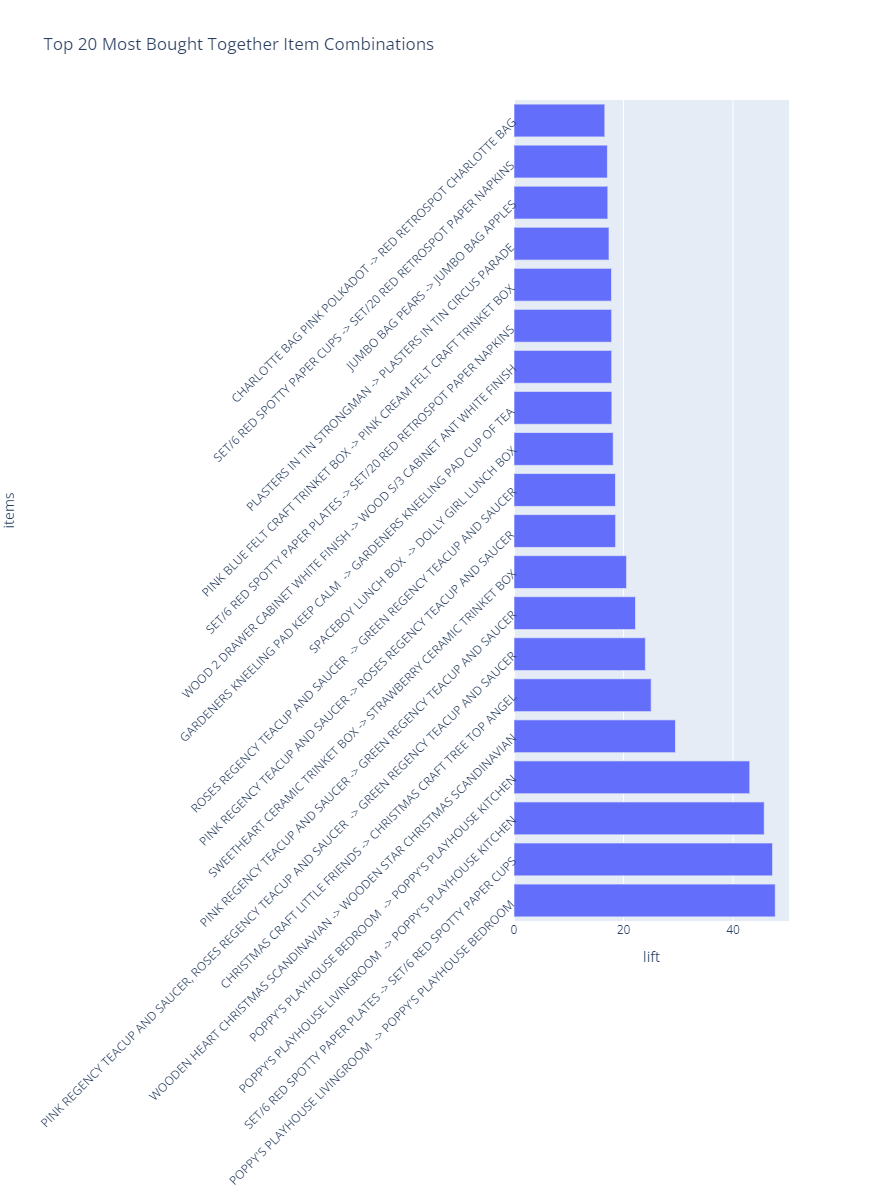

In [70]:
# Get the top association rules sorted by lift
top_association_rules = rules.sort_values(by='lift', ascending=False).head(20)

# Convert item codes to item descriptions for plotting
top_association_rules['antecedents_desc'] = top_association_rules['antecedents'].apply(lambda x: ', '.join(item_mapping.loc[code.strip(), 'Description'] for code in x.split(',')))
top_association_rules['consequents_desc'] = top_association_rules['consequents'].apply(lambda x: ', '.join(item_mapping.loc[code.strip(), 'Description'] for code in x.split(',')))

# Combine antecedents and consequents descriptions for plotting
top_association_rules['items'] = top_association_rules['antecedents_desc'] + ' -> ' + top_association_rules['consequents_desc']

# Create a horizontal bar plot to visualize top association rules
fig = px.bar(top_association_rules, y='items', x='lift', labels={'y': 'Item Combination', 'x': 'Lift'}, title=f'Top {len(top_association_rules)} Most Bought Together Item Combinations', orientation='h')
fig.update_layout(yaxis_tickangle=-45, height=1200)
fig.show()

### Evaluation

In [71]:
# Define function to get frequently bought together items for a given item
def frequently_bought_together(item_id, num_recommendations=5):
    item_description = item_mapping.loc[item_id, 'Description']
    associated_items = rules[rules['antecedents'].apply(lambda x: item_id in x)]
    associated_items = associated_items[associated_items['consequents'] != item_id]
    associated_items = associated_items.sort_values('lift', ascending=False).head(num_recommendations)
    recommended_items = associated_items['consequents'].apply(lambda x: (item_mapping.loc[x, 'Description'])).tolist()
    return recommended_items, item_description

In [73]:
# Test the function with an example item
item_id = '22698'
recommended_items, item_description = frequently_bought_together(item_id)
print("Entered Item ID: ", item_description)
print("Recommended Item IDs: ", recommended_items)

Entered Item ID:  PINK REGENCY TEACUP AND SAUCER
Recommended Item IDs:  ['GREEN REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER ']


In [74]:
# Identify the transactions in which the main item was purchased
main_item_transactions = df[df['StockCode'] == item_id]['InvoiceNo']

# Extract the items bought together with the main item in these transactions
items_bought_together_with_main_item = df[df['InvoiceNo'].isin(main_item_transactions)]['Description'].unique()

# Create a set of recommended items
recommended_items_set = set(recommended_items)

# Calculate precision and recall
intersection = set(items_bought_together_with_main_item) & recommended_items_set
precision = len(intersection) / len(recommended_items_set)
recall = len(intersection) / len(set(items_bought_together_with_main_item))

print("Entered Item ID:", item_description)
print("Recommended Item IDs:", recommended_items)
print("Relevant Item IDs:", items_bought_together_with_main_item)
print("Precision:", precision)
print("Recall:", recall)

Entered Item ID: PINK REGENCY TEACUP AND SAUCER
Recommended Item IDs: ['GREEN REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER ']
Relevant Item IDs: ['LUNCH BAG PINK POLKADOT' 'LUNCH BAG SPACEBOY DESIGN '
 'WHITE HANGING HEART T-LIGHT HOLDER' ... 'GREEN BIRDHOUSE DECORATION'
 'RETROSPOT CANDLE  LARGE' 'PAPERWEIGHT VINTAGE PAISLEY']
Precision: 1.0
Recall: 0.0007952286282306163


In [75]:
# Create lists to store precision and recall values
precision_list = []
recall_list = []

# Loop through each unique item in the DataFrame
for item_id in df['StockCode'].unique():
    recommended_items, item_description = frequently_bought_together(item_id)
    
    # Identify the transactions in which the main item was purchased
    main_item_transactions = df[df['StockCode'] == item_id]['InvoiceNo']
    
    # Extract the items bought together with the main item in these transactions
    items_bought_together_with_main_item = df[df['InvoiceNo'].isin(main_item_transactions)]['Description'].unique()
    
    # Create a set of recommended items
    recommended_items_set = set(recommended_items)
    
    # Calculate precision and recall only if recommended_items_set is not empty
    if recommended_items_set:
        intersection = set(items_bought_together_with_main_item) & recommended_items_set
        precision = len(intersection) / len(recommended_items_set)
        recall = len(intersection) / len(set(items_bought_together_with_main_item))
        precision_list.append(precision)
        recall_list.append(recall)

# Calculate Mean Average Precision (MAP)
avg_map = sum(precision_list) / len(precision_list)

# Calculate Total Precision and Total Recall
avg_precision = sum(precision_list) / len(precision_list)
avg_recall = sum(recall_list) / len(recall_list)

# Print results
print("\nOverall Model Metrics:")
print("----------------------")
print(f"Mean Average Precision: {avg_map:.2f}")
print(f"Total Precision: {avg_precision:.2f}")
print(f"Total Recall: {avg_recall:.2f}")



Overall Model Metrics:
----------------------
Mean Average Precision: 1.00
Total Precision: 1.00
Total Recall: 0.00


Sure, here's an interpretation of the evaluation results for your recommendation engine:

**Strengths:**

* **High Precision:** The recommendation engine demonstrates a high precision value, indicating that the items recommended are highly relevant to the user's initial purchase. This suggests that the engine is effective in identifying items that are frequently bought together with the main item.

* **Mean Average Precision (MAP):** The Mean Average Precision score of 1.00 implies that, on average, the recommended items are consistently relevant and aligned with the items that were actually bought together. This is a strong indicator that the engine is providing accurate and valuable recommendations.

**Weaknesses:**

* **Low Recall:** The low recall score of 0.00 indicates that the engine is missing out on many relevant items that could potentially be recommended to users. It suggests that the engine might not be capturing a wide range of items that are often bought together, leading to missed opportunities for suggesting additional products to users.

**Insights and Recommendations:**

* **Precision-Recall Trade-off:** While achieving high precision is important to ensure relevant recommendations, it's crucial to strike a balance between precision and recall. It's possible that the engine's focus on precision has led to a trade-off with recall, resulting in missed opportunities for suggesting a broader range of items. We might want to consider adjusting the parameters or strategies used to select recommended items to improve recall while maintaining acceptable precision.

* **Diversification of Recommendations:** To improve recall, we can explore techniques that focus on diversifying recommendations. For instance, incorporating methods that recommend items based on user preferences, browsing history, or trending items can help capture a wider range of relevant items, thus enhancing the overall shopping experience.

* **User Feedback and Testing:** To gain a better understanding of user preferences and the effectiveness of the recommendations, consider conducting user testing and gathering feedback. This can provide valuable insights into what users find valuable, and we can fine-tune the recommendation engine accordingly.

* **Continuous Improvement:** Recommendation engines are iterative systems that can benefit from ongoing monitoring and improvement. Regularly analyze user interaction data, evaluate the performance metrics, and adjust the algorithms, parameters, or data sources as needed to enhance the engine's accuracy and coverage.

* **Exploration of Advanced Techniques:** Depending on our resources and goals, we might explore more advanced recommendation techniques, such as collaborative filtering, content-based filtering, or hybrid approaches that combine multiple methods. These techniques can offer more comprehensive and accurate recommendations.

* **Evaluation on a Larger Dataset:** The current evaluation is based on a single dataset. To ensure the generalizability of the results, consider evaluating the recommendation engine on a larger and diverse dataset that captures a wider range of user behaviors and preferences.

In summary, while the recommendation engine demonstrates strong precision and Mean Average Precision, addressing the low recall and exploring techniques to balance precision and recall will be key to enhancing the overall effectiveness of the engine and providing users with a broader range of relevant recommendations.

### Download for Deployment

In [76]:
# Saving to CSV
rules.to_csv('rules.csv')